In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/car/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 791 images belonging to 2 classes.
{'Bikes': 0, 'Cars': 1}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Bikes', 1: 'Cars'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

foot_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
foot_df.file_paths = foot_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
foot_df

file_paths target_names  targets
0    ./datasets/car/original/Bikes/Bikes(train)/141...        Bikes        0
1    ./datasets/car/original/Bikes/Bikes(train)/201...        Bikes        0
2    ./datasets/car/original/Bikes/Bikes(train)/201...        Bikes        0
3    ./datasets/car/original/Bikes/Bikes(train)/45c...        Bikes        0
4    ./datasets/car/original/Bikes/Bikes(train)/Hon...        Bikes        0
..                                                 ...          ...      ...
786  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
787  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
788  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
789  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
790  ./datasets/car/original/Cars/Cars(train)/luxur...         Cars        1

[791 rows x 3 columns]

In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(foot_df.file_paths, 
                 foot_df.targets, 
                 stratify=foot_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
1    320
0    312
Name: count, dtype: int64
targets
1    80
0    79
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    256
0    249
Name: count, dtype: int64
targets
1    64
0    63
Name: count, dtype: int64
targets
1    80
0    79
Name: count, dtype: int64


In [7]:
train_df = foot_df.iloc[train_images.index].reset_index(drop=True)
validation_df = foot_df.iloc[validation_images.index].reset_index(drop=True)
test_df = foot_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(505, 3)
(127, 3)
(159, 3)


In [8]:
import shutil
import os.path

base_dir = './datasets/car/'


for filepath in train_df.file_paths:
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [9]:
import shutil
import os.path

base_dir = './datasets/car/'


for filepath in validation_df.file_paths:
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [10]:
import shutil
import os.path

base_dir = './datasets/car/'


for filepath in test_df.file_paths:
    destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [11]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/car/train/'
validation_dir = './datasets/car/validation/'
test_dir = './datasets/car/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [12]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Bikes', 'Cars']


In [13]:
# 이미지 별 폴더 안 이미지들의 파일명 변경
for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(train_dir, name))):
        # 이전 파일의 전체 경로
        old_file = os.path.join(train_dir + name + '/', file_name)
        # 신규 파일 전체 경로 작성
        new_file = os.path.join(train_dir + name + '/', name + str(i + 1) + '.png')

        # 이전 파일의 이름을 신규 파일로 변경
        os.rename(old_file, new_file)

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(validation_dir, name))):
        # 이전 파일의 전체 경로
        old_file = os.path.join(validation_dir + name + '/', file_name)
        # 신규 파일 전체 경로 작성
        new_file = os.path.join(validation_dir + name + '/', name + str(i + 1) + '.png')

        # 이전 파일의 이름을 신규 파일로 변경
        os.rename(old_file, new_file)

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(test_dir, name))):
        # 이전 파일의 전체 경로
        old_file = os.path.join(test_dir + name + '/', file_name)
        # 신규 파일 전체 경로 작성
        new_file = os.path.join(test_dir + name + '/', name + str(i + 1) + '.png')

        # 이전 파일의 이름을 신규 파일로 변경
        os.rename(old_file, new_file)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
train_generator = idg.flow_from_directory(train_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='binary',
                                          shuffle=True)

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
validation_generator = idg.flow_from_directory(validation_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary')

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary')

# 각 클랙스의 이름과 인덱스 출력
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 505 images belonging to 2 classes.
Found 127 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
{'Bikes': 0, 'Cars': 1}
{'Bikes': 0, 'Cars': 1}
{'Bikes': 0, 'Cars': 1}


In [15]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'Bikes', 1: 'Cars'}

In [16]:
# 각 타겟의 이름 담을 초기 list 선언
tarin_target_names = []
validation_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in train_generator.classes:
    tarin_target_names.append(target_name[target])

for target in validation_generator.classes:
    validation_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(tarin_target_names.__len__(), validation_target_names.__len__(), test_target_names.__len__())

505 127 159


In [17]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': tarin_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': validation_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df)
display(validation_df)
display(test_df)

file_paths target_names  targets
0    ./datasets/car/train/Bikes/Bikes1.png/14137380...        Bikes        0
1    ./datasets/car/train/Bikes/Bikes1.png/2017-Baj...        Bikes        0
2    ./datasets/car/train/Bikes/Bikes1.png/45c0d930...        Bikes        0
3    ./datasets/car/train/Bikes/Bikes1.png/ImageUpl...        Bikes        0
4    ./datasets/car/train/Bikes/Bikes1.png/a340a6d0...        Bikes        0
..                                                 ...          ...      ...
500  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
501  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
502  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
503     ./datasets/car/train/Cars/Cars1.png/images.jpg         Cars        1
504  ./datasets/car/train/Cars/Cars1.png/luxury-car...         Cars        1

[505 rows x 3 columns]

file_paths target_names  targets
0    ./datasets/car/validation/Bikes/Bikes1.png/IMG...        Bikes        0
1    ./datasets/car/validation/Bikes/Bikes1.png/IMG...        Bikes        0
2    ./datasets/car/validation/Bikes/Bikes1.png/dow...        Bikes        0
3    ./datasets/car/validation/Bikes/Bikes1.png/dow...        Bikes        0
4    ./datasets/car/validation/Bikes/Bikes1.png/dow...        Bikes        0
..                                                 ...          ...      ...
122  ./datasets/car/validation/Cars/Cars1.png/image...         Cars        1
123  ./datasets/car/validation/Cars/Cars1.png/image...         Cars        1
124  ./datasets/car/validation/Cars/Cars1.png/image...         Cars        1
125  ./datasets/car/validation/Cars/Cars1.png/image...         Cars        1
126  ./datasets/car/validation/Cars/Cars1.png/image...         Cars        1

[127 rows x 3 columns]

file_paths target_names  targets
0    ./datasets/car/test/Bikes/Bikes1.png/2017-Baja...        Bikes        0
1    ./datasets/car/test/Bikes/Bikes1.png/Honda-Bik...        Bikes        0
2    ./datasets/car/test/Bikes/Bikes1.png/download ...        Bikes        0
3    ./datasets/car/test/Bikes/Bikes1.png/download ...        Bikes        0
4    ./datasets/car/test/Bikes/Bikes1.png/download ...        Bikes        0
..                                                 ...          ...      ...
154  ./datasets/car/test/Cars/Cars1.png/images - 20...         Cars        1
155  ./datasets/car/test/Cars/Cars1.png/images - 20...         Cars        1
156  ./datasets/car/test/Cars/Cars1.png/images - 20...         Cars        1
157  ./datasets/car/test/Cars/Cars1.png/images - 20...         Cars        1
158  ./datasets/car/test/Cars/Cars1.png/images - 20...         Cars        1

[159 rows x 3 columns]

In [18]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(505, 3)
(127, 3)
(159, 3)


## **사전훈련모델**

In [19]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [20]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [21]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [22]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=2, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [24]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17328\1732152726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))


In [25]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(2, 244, 244, 3) (2, 2)


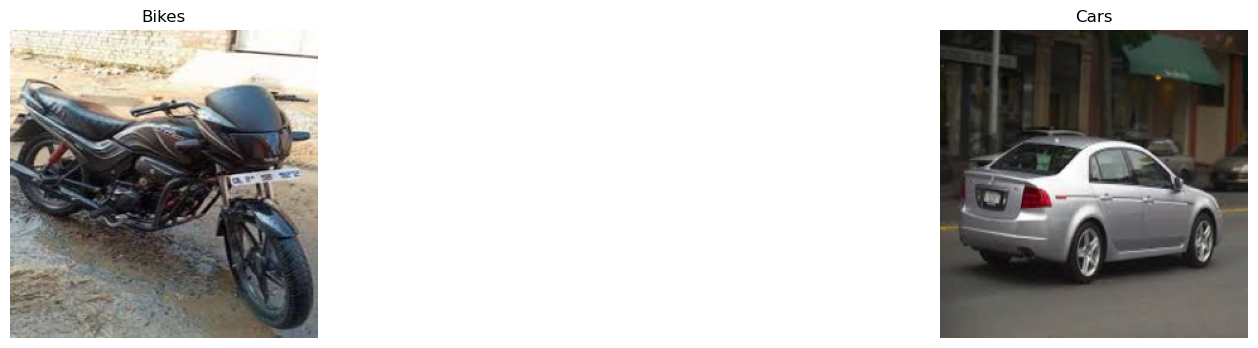

In [26]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=2, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
[[('n03785016', 'moped', 0.53007996), ('n03791053', 'motor_scooter', 0.22470932), ('n04482393', 'tricycle', 0.091335565), ('n03777568', 'Model_T', 0.04068256), ('n02797295', 'barrow', 0.040467415)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[('n02930766', 'cab', 0.2718765), ('n04285008', 'sports_car', 0.09859866), ('n02814533', 'beach_wagon', 0.09577352), ('n03670208', 'limousine', 0.08125938), ('n04461696', 'tow_truck', 0.054749086)]]


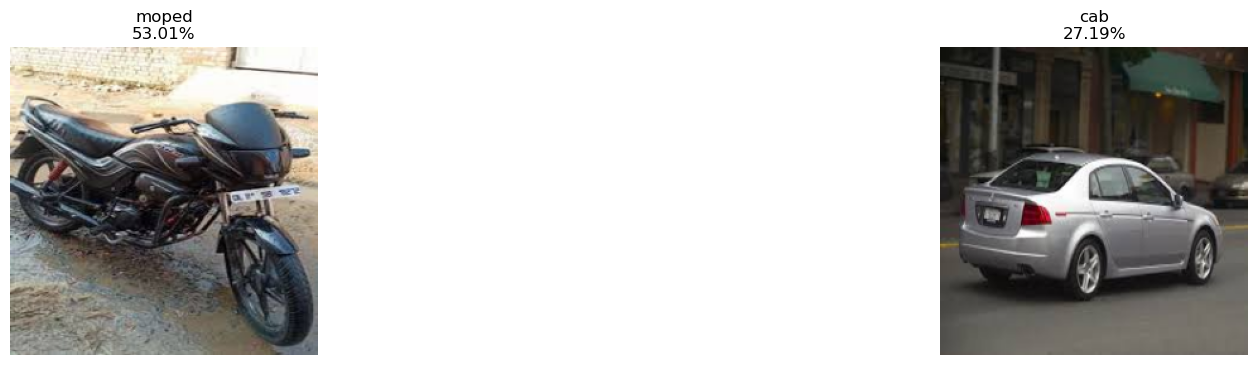

In [27]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n07613480', 'trifle', 0.7650727), ('n02089973', 'English_foxhound', 0.23492733), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[('n02089973', 'English_foxhound', 0.9999994), ('n07613480', 'trifle', 5.397828e-07), ('n02356798', 'fox_squirrel', 3.4150242e-20), ('n01855032', 'red-breasted_merganser', 3.1006846e-28), ('n02105056', 'groenendael', 3.3580776e-29)]]


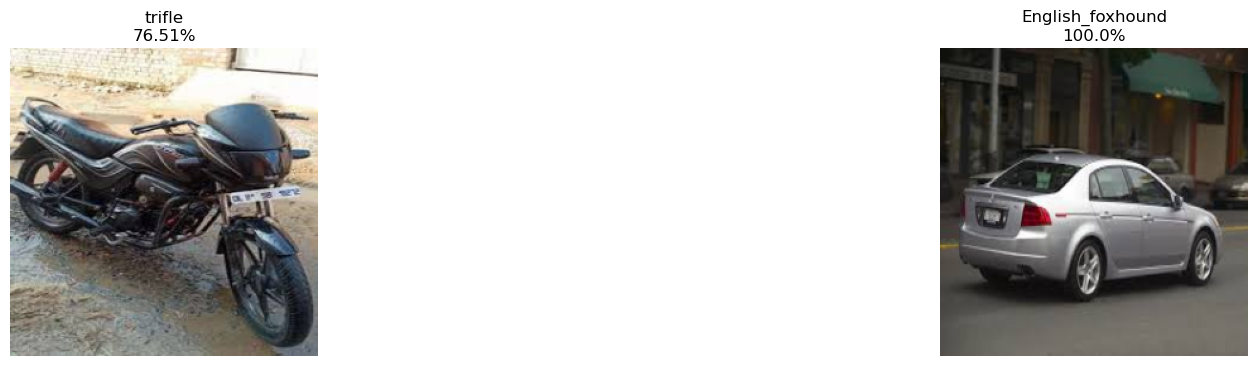

In [28]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03775546', 'mixing_bowl', 0.97782075), ('n03942813', 'ping-pong_ball', 0.022179212), ('n03445777', 'golf_ball', 2.9746727e-10), ('n03814906', 'necklace', 2.3096533e-10), ('n03291819', 'envelope', 1.396202e-10)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[('n03775546', 'mixing_bowl', 0.9996145), ('n04127249', 'safety_pin', 0.0003841507), ('n02443484', 'black-footed_ferret', 8.852351e-07), ('n03445777', 'golf_ball', 4.8946293e-07), ('n03942813', 'ping-pong_ball', 3.4940414e-10)]]


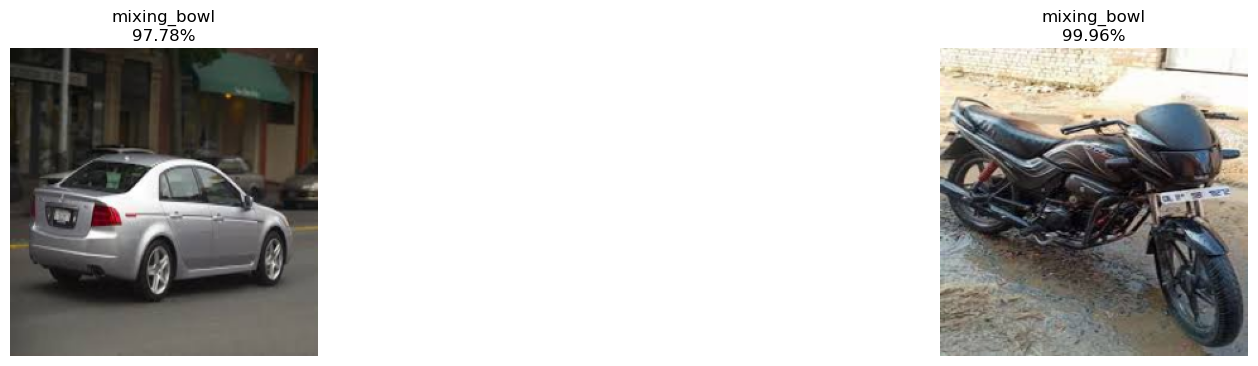

In [29]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03938244', 'pillow', 0.7973246), ('n04209239', 'shower_curtain', 0.16933946), ('n03485794', 'handkerchief', 0.0062634163), ('n04033995', 'quilt', 0.0040963707), ('n04548362', 'wallet', 0.0029690906)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[('n04209239', 'shower_curtain', 0.5003932), ('n03938244', 'pillow', 0.29106036), ('n04033995', 'quilt', 0.03619523), ('n04548362', 'wallet', 0.024971781), ('n03291819', 'envelope', 0.016216272)]]


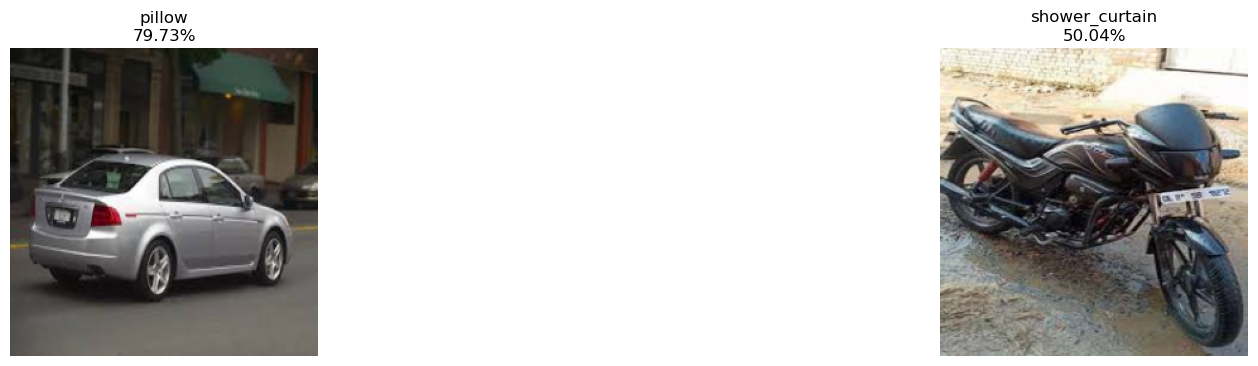

In [30]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

In [ ]:
# 유사도가 낮지만 vgg16 모델이 반은 맞춰 제일 유사하다고 판단
# vgg16 모델로 진행

In [31]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [52]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
# aug = A.Compose([
#     A.ShiftScaleRotate(p=0.5),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        # aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [54]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [55]:
import gc

# 메모리 해제 함수
gc.collect()

71243

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [56]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.5120 - loss: 1.0472 - val_acc: 0.5039 - val_loss: 17.5806 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 949ms/step - acc: 0.7928 - loss: 0.5471 - val_acc: 0.4646 - val_loss: 14.7513 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 934ms/step - acc: 0.9066 - loss: 0.2385 - val_acc: 0.5039 - val_loss: 14.5258 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 928ms/step - acc: 0.9767 - loss: 0.0771 - val_acc: 0.5039 - val_loss: 10.7140 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 931ms/step - acc: 0.9981 - loss: 0.0269 - val_acc: 0.5039 - val_loss: 9.6877 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 936ms/step - acc: 0.9931 - loss: 0.0373 - val_acc: 0.5039 - val_loss: 18.1649 - learning_rate: 0.0010
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 938ms/step - acc: 0.9906 - loss: 0.0322 - val_acc: 0.5039 - val_loss: 15.3453 - learning_rate: 0.0010
Epoch 8/10
8/8 ━━━━━━━━━━━━

In [57]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - acc: 0.5991 - loss: 6.4491


[4.704944133758545, 0.698113203048706]

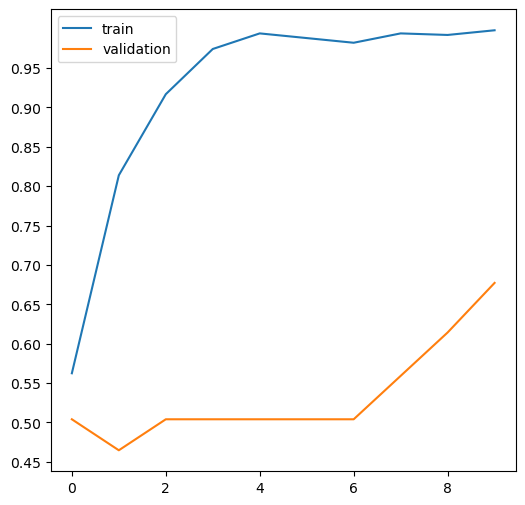

In [59]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

## **2Cycle**

In [ ]:
# 이미지 증강

In [64]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [65]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [66]:
import gc

# 메모리 해제 함수
gc.collect()

39519

In [67]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.5548 - loss: 1.0036 - val_acc: 0.4961 - val_loss: 18.1949 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 954ms/step - acc: 0.8126 - loss: 0.5069 - val_acc: 0.5433 - val_loss: 4.3137 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 956ms/step - acc: 0.9168 - loss: 0.2822 - val_acc: 0.7480 - val_loss: 0.9157 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 979ms/step - acc: 0.9337 - loss: 0.1757 - val_acc: 0.7638 - val_loss: 1.3888 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 976ms/step - acc: 0.9074 - loss: 0.2431 - val_acc: 0.5118 - val_loss: 16.1036 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 973ms/step - acc: 0.9499 - loss: 0.1368 - val_acc: 0.6457 - val_loss: 5.2202 - learning_rate: 1.0000e-04
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 972ms/step - acc: 0.9618 - loss: 0.0966 - val_acc: 0.8346 - val_loss: 1.3068 - learning_rate: 1.0000e-04


In [68]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - acc: 0.7898 - loss: 1.5346


[2.123861312866211, 0.7358490824699402]

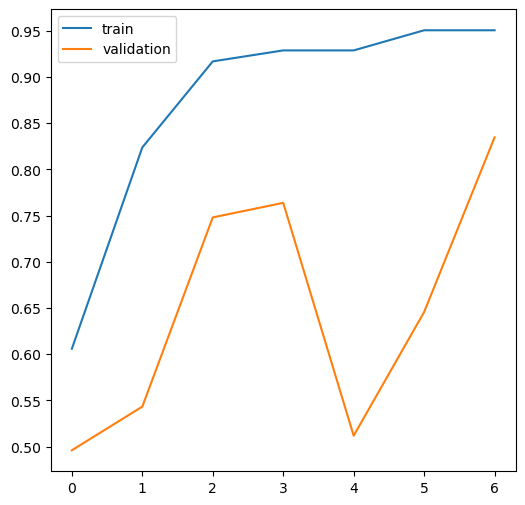

In [69]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

## **3Cycle**

In [ ]:
# 이미지 증강을 강화해서 다양성을 높여 모델이 더 일반화 되게 해준

In [119]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [120]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [121]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [122]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_21[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [123]:
import gc

# 메모리 해제 함수
gc.collect()

48664

In [124]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.5393 - loss: 0.9732 - val_acc: 0.4567 - val_loss: 3.6280 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.7408 - loss: 0.6099 - val_acc: 0.5354 - val_loss: 8.2013 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.8680 - loss: 0.3355 - val_acc: 0.6693 - val_loss: 20.8963 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.8836 - loss: 0.2896 - val_acc: 0.6614 - val_loss: 15.6618 - learning_rate: 1.0000e-04


## **4Cycle**

In [131]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [132]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [133]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_23[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [134]:
import gc

# 메모리 해제 함수
gc.collect()

10798

In [135]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [136]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.5507 - loss: 0.8988 - val_acc: 0.5039 - val_loss: 36.7348 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.7005 - loss: 0.6567 - val_acc: 0.5039 - val_loss: 28.7082 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.8514 - loss: 0.3000 - val_acc: 0.5039 - val_loss: 16.9906 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9201 - loss: 0.2322 - val_acc: 0.5039 - val_loss: 23.5263 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9328 - loss: 0.1759 - val_acc: 0.5039 - val_loss: 31.4561 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9728 - loss: 0.1343 - val_acc: 0.6929 - val_loss: 6.9150 - learning_rate: 0.0010
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9693 - loss: 0.0734 - val_acc: 0.5906 - val_loss: 11.5627 - learning_rate: 0.0010
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━

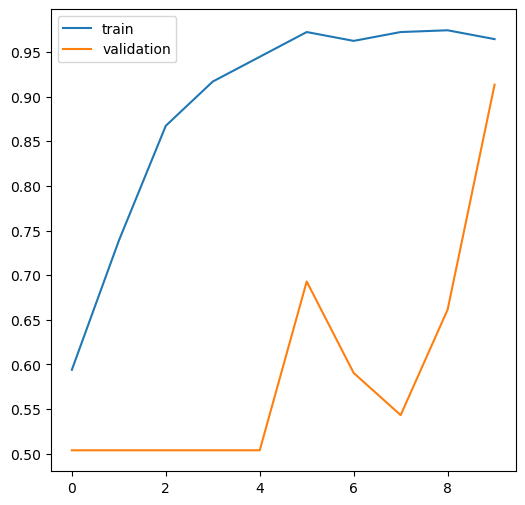

In [138]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [137]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - acc: 0.8512 - loss: 7.8000


[5.677238941192627, 0.8742138147354126]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
bikes


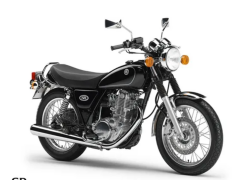

In [140]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_bikes.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
bikes


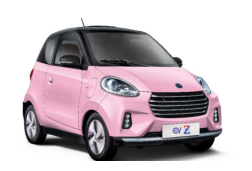

In [141]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_cars.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

## **5Cycle**

In [219]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [220]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [221]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_32[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [222]:
import gc

# 메모리 해제 함수
gc.collect()

62853

In [223]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - acc: 0.4861 - loss: 1.1358 - val_acc: 0.6772 - val_loss: 0.7691 - learning_rate: 1.0000e-04
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.6328 - loss: 0.7493 - val_acc: 0.6929 - val_loss: 0.6142 - learning_rate: 1.0000e-04
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.6340 - loss: 0.6897 - val_acc: 0.7717 - val_loss: 0.5368 - learning_rate: 1.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.6733 - loss: 0.6053 - val_acc: 0.8031 - val_loss: 0.4975 - learning_rate: 1.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.7111 - loss: 0.6126 - val_acc: 0.8110 - val_loss: 0.3480 - learning_rate: 1.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.7361 - loss: 0.5319 - val_acc: 0.8583 - val_loss: 0.2961 - learning_rate: 1.0000e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.7739 - loss: 0.5049 - val_acc: 0.8819 - val_loss: 0.2644 - learning_rate: 1.0000e-04
Epoch 

In [224]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - acc: 0.9655 - loss: 0.1373


[0.1336473524570465, 0.9622641801834106]

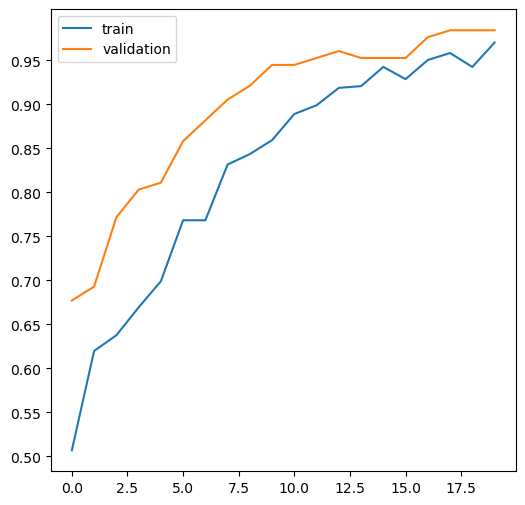

In [225]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
bikes


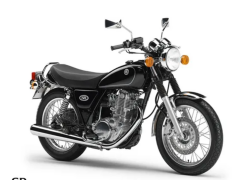

In [226]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_bikes.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
bikes


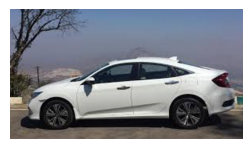

In [227]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_cars.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

## **6Cycle**

In [254]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 150
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [255]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [256]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [258]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_39[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [259]:
import gc

# 메모리 해제 함수
gc.collect()

65837

In [260]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - acc: 0.5104 - loss: 0.9821 - val_acc: 0.6535 - val_loss: 0.9204 - learning_rate: 1.0000e-04
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - acc: 0.8187 - loss: 0.3945 - val_acc: 0.8110 - val_loss: 0.5255 - learning_rate: 1.0000e-04
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - acc: 0.9431 - loss: 0.1803 - val_acc: 0.8583 - val_loss: 0.3280 - learning_rate: 1.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - acc: 0.9570 - loss: 0.1411 - val_acc: 0.9055 - val_loss: 0.3300 - learning_rate: 1.0000e-04


In [261]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - acc: 0.8367 - loss: 0.6189


[0.44658753275871277, 0.8805031180381775]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
bikes


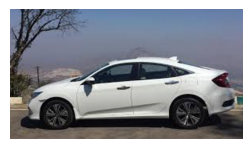

In [263]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_cars.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (150, 150))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

## **7Cycle**

In [264]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 244
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [265]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [266]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [267]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 250, 250, 3)       │               0 │ input_layer_40[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 122, 122, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 124, 124, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 61, 61, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 61, 61, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 61, 61, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 61, 61, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 63, 63, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 61, 61, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [268]:
import gc

# 메모리 해제 함수
gc.collect()

95305

In [269]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 118s 11s/step - acc: 0.5949 - loss: 0.7522 - val_acc: 0.5276 - val_loss: 1.1134 - learning_rate: 1.0000e-04
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - acc: 0.9251 - loss: 0.2478 - val_acc: 0.8189 - val_loss: 0.4180 - learning_rate: 1.0000e-04
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - acc: 0.9745 - loss: 0.1162 - val_acc: 0.9291 - val_loss: 0.1364 - learning_rate: 1.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - acc: 0.9959 - loss: 0.0511 - val_acc: 0.9764 - val_loss: 0.0628 - learning_rate: 1.0000e-04


In [270]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.9643 - loss: 0.0698


[0.08827202022075653, 0.955974817276001]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[0.7806268]
bikes


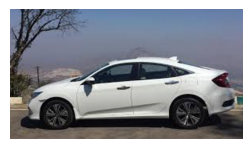

In [281]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/car_cars.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (244, 244))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['bikes', 'cars']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_probabilities)
print(predicted_class_name)

In [273]:
def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.Compose([A.HorizontalFlip(p=0.5), 
                     A.VerticalFlip(p=0.5), 
                     A.OneOf([A.ColorJitter(p=1), 
                              A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)], 
                             p=1)], p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[[0.7349599]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[[0.6551251]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[0.70377815]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.70943445]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[0.7108002]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[0.6633537]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.70245785]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[[0.7037128]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[0.67312336]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.7082206]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[0.6928102]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.7958735]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[0.69251937]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[[0.6633537]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[0.7108002]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.68084437]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[[0.73260474]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[0.7155429]]
0
1/1

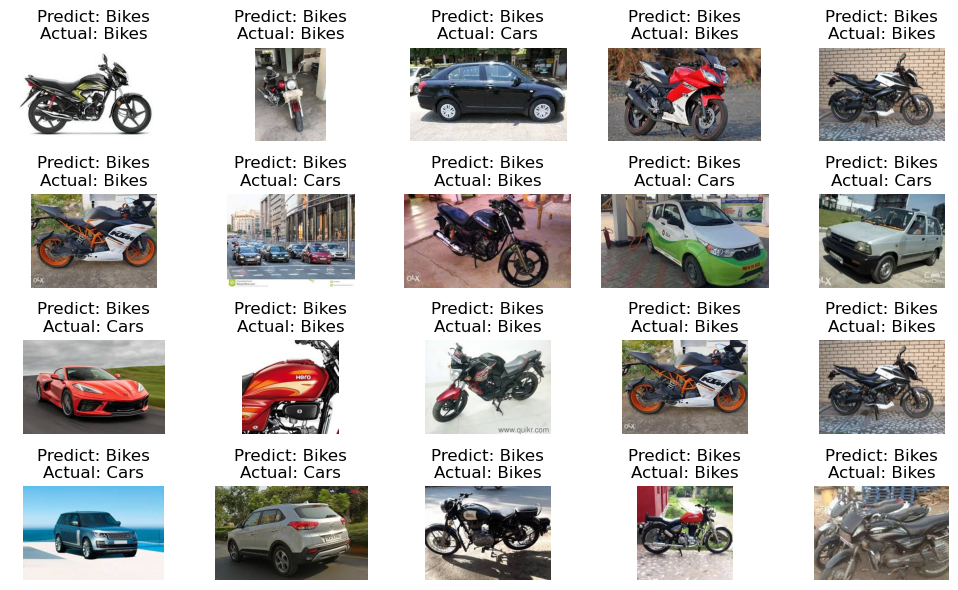

In [277]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

IMAGE_DIR = './datasets/car/test/'
class_names = train_df.target_names.unique().tolist()

def load_random_images(image_dir, class_names, num_images=20):
    selected_classes = random.choices(class_names, k=num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size, mode='tf'):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    preprocessed_image = preprocessing_scaling(resized_image, mode=mode)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    return preprocessed_image

random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

plt.figure(figsize=(10, 6))

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE, mode='tf')
    predictions = model.predict(preprocessed_image)
    print(predictions)
    predicted_index = np.argmax(predictions[0])
    # predicted_class = int(predictions[0][0] < 0.5)

    print(predicted_index)
    # print(class_names)
    
    predicted_class_name = class_names[predicted_index]
    
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

print(class_names)
plt.tight_layout()
plt.show()